In [2]:
# 导入相关python库
import os
import numpy as np
import pandas as pd

#设定随机数种子
np.random.seed(36)

#使用matplotlib库画图
import matplotlib
import seaborn
import matplotlib.pyplot as plot

from sklearn import datasets

In [38]:
X= pd.read_excel('train.xlsx')
y = pd.read_excel('train_target.xlsx')  #销售价格

In [39]:
#读取数据,分训练集测试集
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train , y_test  = train_test_split(X,y)

In [40]:
x_train.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7499 entries, 860 to 4223
Data columns (total 13 columns):
20150302.0    7499 non-null int64
3.0           7499 non-null int64
2.25          7499 non-null float64
1670.0        7499 non-null int64
6240.0        7499 non-null int64
1.0           7499 non-null float64
8.0           7499 non-null int64
1240.0        7499 non-null int64
430.0         7499 non-null int64
1974.0        7499 non-null int64
0.0           7499 non-null int64
47.6413       7499 non-null float64
-122.113      7499 non-null float64
dtypes: float64(4), int64(9)
memory usage: 820.2 KB


数据归一化

In [41]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()
minmax_scaler.fit(x_train)   #进行内部拟合，内部参数会发生变化
x_train = minmax_scaler.transform(x_train)
x_train

array([[0.05197007, 0.33333333, 0.12903226, ..., 0.        , 0.9181627 ,
        0.14950166],
       [0.97825436, 0.33333333, 0.12903226, ..., 0.        , 0.46967492,
        0.1910299 ],
       [0.98034913, 0.33333333, 0.12903226, ..., 0.        , 0.59129872,
        0.12375415],
       ...,
       [0.04987531, 0.33333333, 0.12903226, ..., 0.        , 0.29581109,
        0.35714286],
       [0.99850374, 0.44444444, 0.32258065, ..., 0.        , 0.46773411,
        0.31561462],
       [0.03241895, 0.33333333, 0.32258065, ..., 0.        , 0.95536148,
        0.27906977]])

In [42]:
mm=MinMaxScaler()
mm.fit(x_test)
x_test = mm.transform(x_test)

In [45]:
y_train.shape

(7499, 1)

In [46]:
#选择基于梯度下降的线性回归模型
from sklearn.linear_model import LinearRegression
LR_reg=LinearRegression()
#进行拟合
LR_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
LR_reg.coef_

array([[  36675.45527212, -457644.19327094,  444663.61625747,
         884850.1079766 ,  -94173.49178889,  -19847.36548103,
        1149950.78524888,  902048.00125321,  268677.00181159,
        -347991.4009206 ,   59727.98228446,  319468.99479203,
        -185354.44577138]])

In [48]:
LR_reg.intercept_

array([-235967.66943197])

In [50]:
y_predict = LR_reg.predict(x_test)
y_predict

array([[579859.61711112],
       [266483.99485061],
       [992162.7727324 ],
       ...,
       [548024.84523154],
       [467998.15321782],
       [866305.35212028]])

In [51]:
LR_reg.score(x_test,y_test)

0.6128060824978716

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


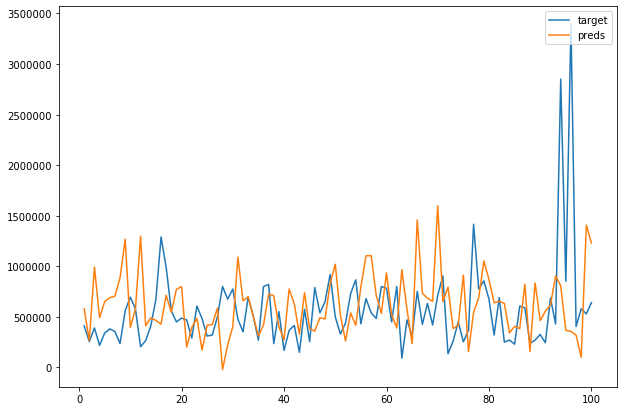

In [54]:
plot.figure(figsize=(10,7))       #画布大小
num=100
x=np.arange(1,num+1)             
plot.plot(x,y_train[:num],label='target')      #目标取值
plot.plot(x,y_predict[:num],label='preds')        #预测取值
plot.legend(loc='upper right')  #线条显示位置
plot.show()